# 1. 🌟 What is Feature Scaling?

- ##### **Feature Scaling** is a **data preprocessing technique** used to **normalize the range of independent variables** or **features** in your dataset.
- ##### In simple terms — it ensures that all numerical features are on **the same scale**, so that **no single feature dominates others** due to its magnitude.

<hr>

## 💡 Why is it needed ?

#### Let’s say you have two features:

- `Age`: ranges from 20 to 60

- `Income`: ranges from 10,000 to 100,000

##### Now if you apply a distance-based algorithm (like **KNN**, **K-Means**, or **SVM**) or gradient-based one (like **Linear Regression**, **Logistic Regression**),the **larger scale feature (Income) will dominate** the results.

##### **Example without scaling**:

- Income = 90,000 and Age = 30

- A small change in Income affects the model far more than a big change in Age.

Hence, **feature scaling balances** their influence.

<hr>

# ⚙️ 2. Types of Feature Scaling Techniques

##### We broadly divide them into **two categories**:

| Category            | Purpose                                                | Techniques                       | Suitable When                                  |
| ------------------- | ------------------------------------------------------ | -------------------------------- | ---------------------------------------------- |
| **Normalization**   | Scales features into a specific range (e.g., [0,1])    | Min-Max, MaxAbs                  | Data has no outliers; bounded input is desired |
| **Standardization** | Centers data around mean=0, std=1 (or robust measures) | Z-score, Robust, Quantile, Power | Data has outliers or varied distributions      |

### ➡️ different Scaling techniques

| Type                | Methods                                                              | When to Use                                                                |
| ------------------- | -------------------------------------------------------------------- | -------------------------------------------------------------------------- |
| **Normalization**   | Min-Max Scaling                                                      | When you know data has no outliers & you want data in a fixed range [0, 1] |
| **Standardization** | Z-Score Standardization                                              | When data has outliers or different distributions                          |
| **Robust Scaling**  | Using Median & IQR                                                   | When data has many outliers                                                |
| **Others**          | MaxAbsScaler, Log Transform, Quantile Transformer, Power Transformer | For special cases like sparse data or non-linear distributions             |

<br>
<hr>




# 🧠 3. **Standard Scaling or Z-Score Normalization**  

#### 📘 Formula

$$
Z = \frac{X - X{mean} }{std}
$$

👉 It try to Center data around mean = 0 and the std of X = 1 

#### 📈 Intuition:

- Each feature’s mean value becomes 0, and the standard deviation becomes 1.
Everything else is proportionally scaled.





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# we will be applying the scaling techniques on CoapplicantIncome and ApplicantIncome
# Thats why first check for null value in them

print(df["CoapplicantIncome"].isnull().sum())
df.isnull().sum()

0


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.fillna({"ApplicantIncome": df["ApplicantIncome"].mean()}, inplace = True)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

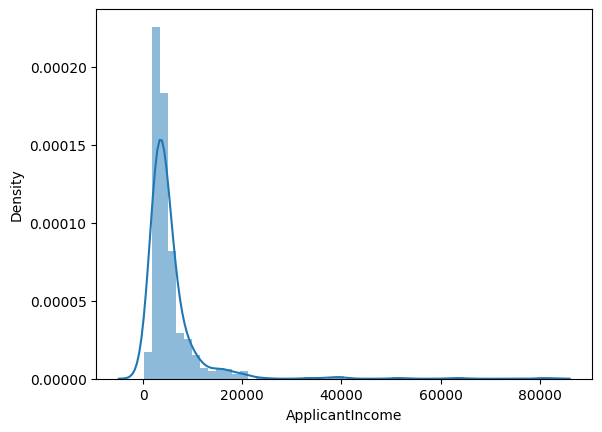

In [5]:
sns.histplot(
    x = "ApplicantIncome",
    data = df,
    kde = True,
    stat = "density",
    kde_kws = dict(cut = 3),
    # alpha = 0.4,
    edgecolor = [1,1,1,0],
    bins = 50
    
)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler

# Importing Standard Scaler

In [8]:
ss = StandardScaler()

In [9]:
ss.fit(df[["ApplicantIncome"]])

StandardScaler()

In [10]:

df["ApplicantIncome_ss"] =  ss.transform(df[["ApplicantIncome"]])

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


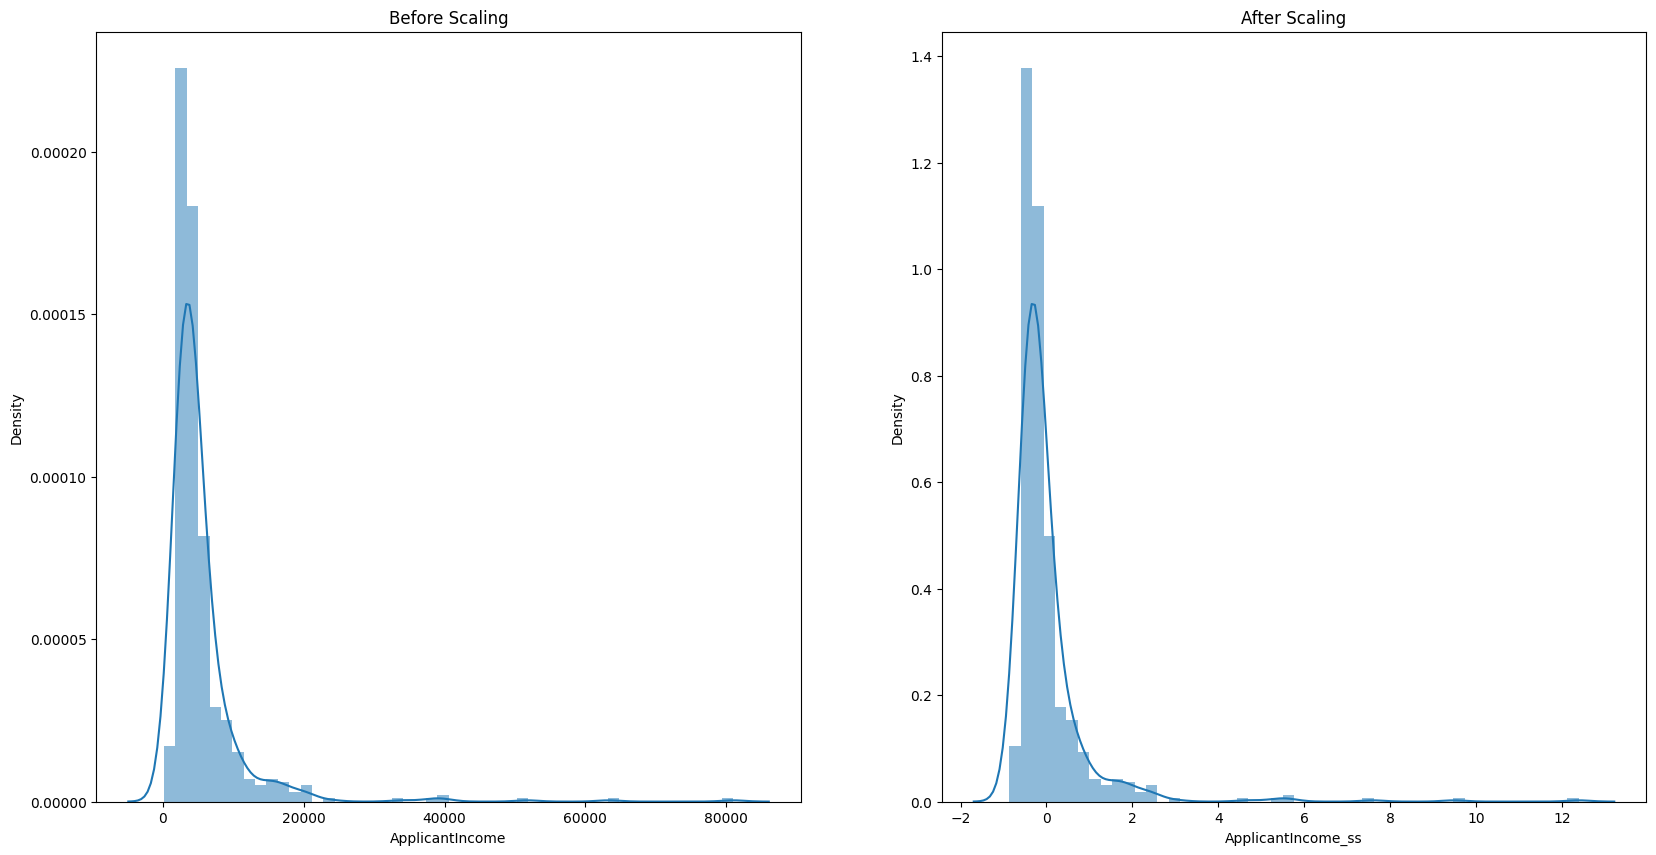

In [13]:

plt.figure(figsize=(20,10))


plt.subplot(1,2,1) #row,column,position

plt.title("Before Scaling")
sns.histplot(
    x = "ApplicantIncome",
    data = df,
    kde = True,
    stat = "density",
    kde_kws = dict(cut = 3),
    # alpha = 0.4,
    edgecolor = [1,1,1,0],
    bins = 50
    
)

plt.subplot(1,2,2) 

plt.title("After Scaling")
sns.histplot(
    x = "ApplicantIncome_ss",
    data = df,
    stat = "density",
    kde = True,
    kde_kws = dict(cut = 3),
    edgecolor = (1,1,1,0),
    bins = 50 
    
)
plt.show()

# 🧠 4. **Normalization or Min-Max Normalization**  

#### 📘 Formula

$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

👉 Transforms all features to range [0, 1].

#### 📈 Intuition:

- Each feature’s smallest value becomes 0, and the largest becomes 1.
Everything else is proportionally scaled between 0 and 1.





In [14]:
#Importing MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [15]:
MMS = MinMaxScaler()

In [16]:
dataset = pd.read_csv("loan_data_set.csv")

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
to_scale = ["CoapplicantIncome","ApplicantIncome"]

In [19]:
dataset[to_scale].head()

,CoapplicantIncome,ApplicantIncome
0,0.0,5849
1,1508.0,4583
2,0.0,3000
3,2358.0,2583
4,0.0,6000


In [20]:
for col in to_scale:
    dataset[[f"{col}_mms"]] = MMS.fit_transform(dataset[[col]])

#### ➡️ as we can see the data is in the range of 0 and 1

In [21]:
after_scale = ["CoapplicantIncome_mms","ApplicantIncome_mms"]

dataset[after_scale].head()

,CoapplicantIncome_mms,ApplicantIncome_mms
0,0.000000,0.070489
1,0.036192,0.054830
2,0.000000,0.035250
3,0.056592,0.030093
4,0.000000,0.072356


## 🆚 Before and After MinMaxScaling Comparison 

## ⭐ NOTE :

#### 🧠 **Meaning of (1, 2) in `plt.subplots(1, 2)`**

- The arguments (1, 2) define the layout grid of subplots — i.e.,
- how many rows and how many columns of plots you want.

- The first number (1) → number of rows

- The second number (2) → number of columns

## 🌟 either **`plt.subplots_adjust(wspace = floatValue)`** will work or **`plt.tight_layout()`** will work They don't work together so comment out the one of them

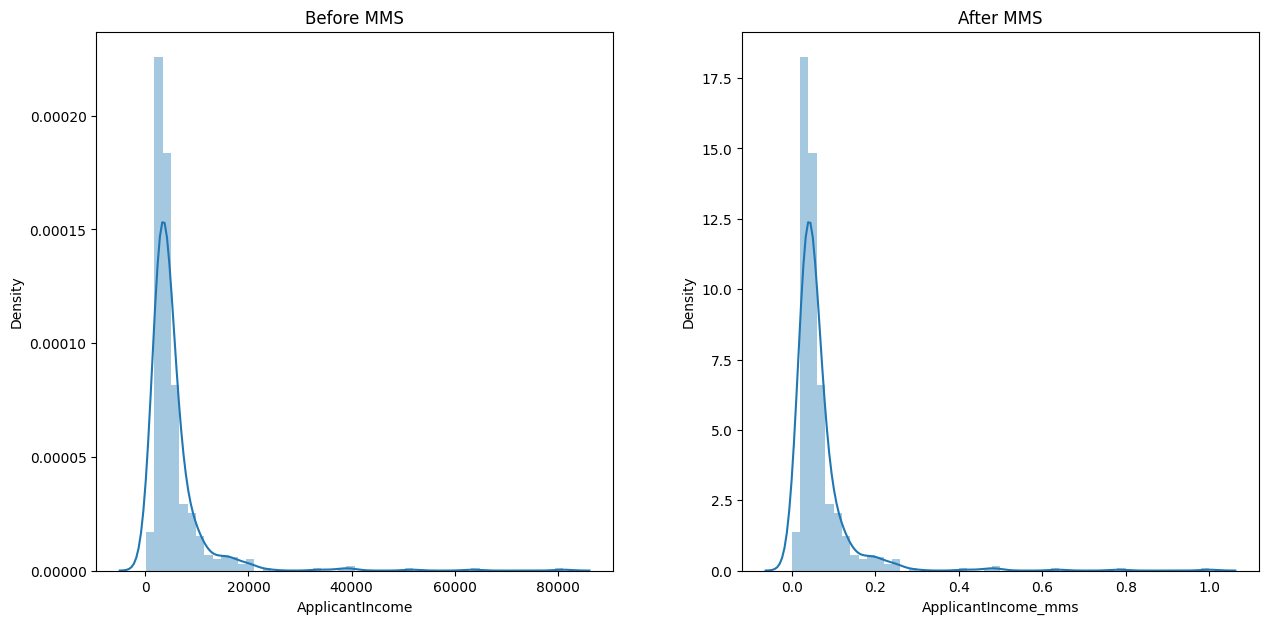

In [22]:
# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Before MMS")

fig, axes = plt.subplots(1, 2, figsize = (15,7))

sns.histplot(
    x = "ApplicantIncome",
    data = dataset,
    stat = "density",
    kde  = True,
    kde_kws=dict(cut = 3),
    edgecolor = (1,1,1,0),
    alpha = 0.4,
    bins = 50,
    ax = axes[0]
)

axes[0].set_title("Before MMS")


# plt.subplot(1,2,2)
# plt.title("After MMS")

sns.histplot(
    x = "ApplicantIncome_mms",
    data = dataset,
    kde = True,
    stat = "density",
    kde_kws = dict(cut = 3),
    edgecolor = (1,1,1,0),
    alpha = 0.4,
    bins = 50,
    ax = axes[1]
)

axes[1].set_title("After MMS")
plt.subplots_adjust(wspace= 0.25)
# plt.tight_layout()
plt.show()

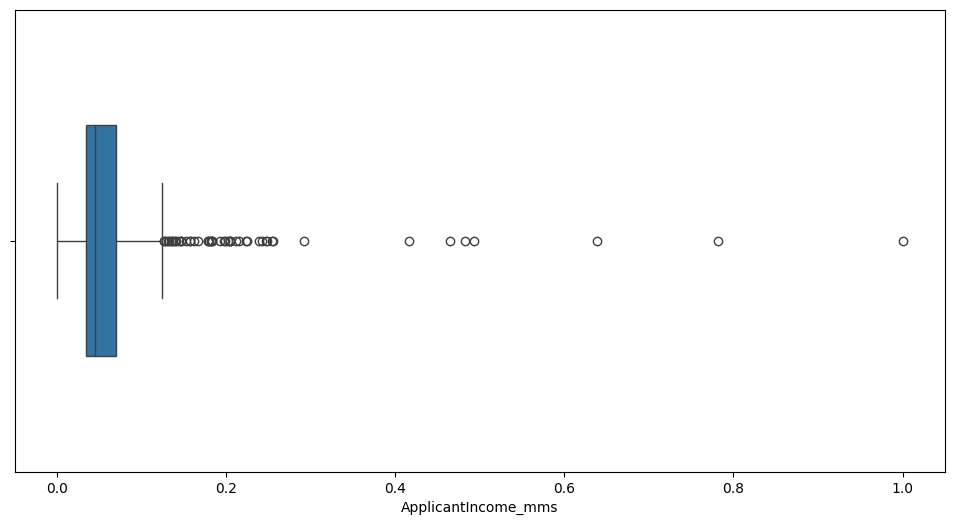

In [23]:
plt.figure(figsize = (12,6))

sns.boxplot(
    x = "ApplicantIncome_mms",
    data = dataset,
    # x = dataset["ApplicantIncome_mms"],
    width  = 0.5
)

plt.show()

In [24]:
#lets perform outlier handling through IQR method
median = dataset["ApplicantIncome_mms"].median()
median

np.float64(0.04529993815708101)

In [25]:
q1 = dataset["ApplicantIncome_mms"].quantile(0.25)
q3 = dataset["ApplicantIncome_mms"].quantile(0.75)
# interquartile range

iqr = q3 = q1

upper_bound  = q3 + 1.5*iqr
upper_bound

dataset[dataset["ApplicantIncome_mms"] > upper_bound ]



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_mms,ApplicantIncome_mms
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,0.263230,0.156970
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,0.000000,0.092888
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y,0.000000,0.116388
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,0.071999,0.152752
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,0.000000,0.140383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y,0.000000,0.197526
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y,0.000000,0.121373
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y,0.000000,0.146568
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.005760,0.097984


In [26]:
df = dataset.copy(deep = True)
df1 = dataset.copy(deep = True)

In [27]:
# NOw its time for the lower bound

lower_bound = q1 - 1.5*iqr

dataset[dataset["ApplicantIncome_mms"] < lower_bound ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_mms,ApplicantIncome_mms


### ⭐⭐⭐ for below code

- #### python can show error when col is int and median calculate is float thats why use round() followed by astype(int) to convert it

- ####  **`df.loc[condition, column] = value`**
```python
    dataset.loc[dataset["ApplicantIncome"] > upper_bound, "ApplicantIncome"] = median.round().astype(int) 

```

# 💀 **MISTAKE** : **Replacing outliers with the median can shrink the IQR, making whiskers shorter and causing the boxplot to show new outliers, even though mathematically there may be none beyond the previous bounds. Why previous bounds because boxplot will calculate the bounds for whisker again which are affected by the replaced value of outliers i.e median**

## ➡️ What happens when you replace outliers with the median :question:

#### Let’s say you had this example data:

```maths
    [10, 12, 13, 14, 15, 16, 17, 200]

```

- **Before replacement:**
  
    - Q1 = 12.25, Q3 = 16.75

    - IQR = 4.5

    - Upper Bound = 16.75 + 1.5×4.5 = 23.5 → So 200 is an outlier.

- **After replacing 200 with median (15):**
  
    - Data = [10, 12, 13, 14, 15, 15, 16, 17]
  
    - Q1 = 12.75, Q3 = 15.75
  
    - IQR = 3.0
  
    - Upper Bound = 15.75 + 1.5×3.0 = 20.25

#### Now, your whiskers shrink! 😮
#### So even some “normal” values like 21 (if existed) would appear as an outlier in the boxplot, even though mathematically they’re not extreme.

## 💀 so below we are doing mistake 



In [28]:
dataset.loc[dataset["ApplicantIncome_mms"] > upper_bound, "ApplicantIncome_mms"] = median

In [29]:
dataset[dataset["ApplicantIncome_mms"] > upper_bound]
# not a single outlier is there

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_mms,ApplicantIncome_mms


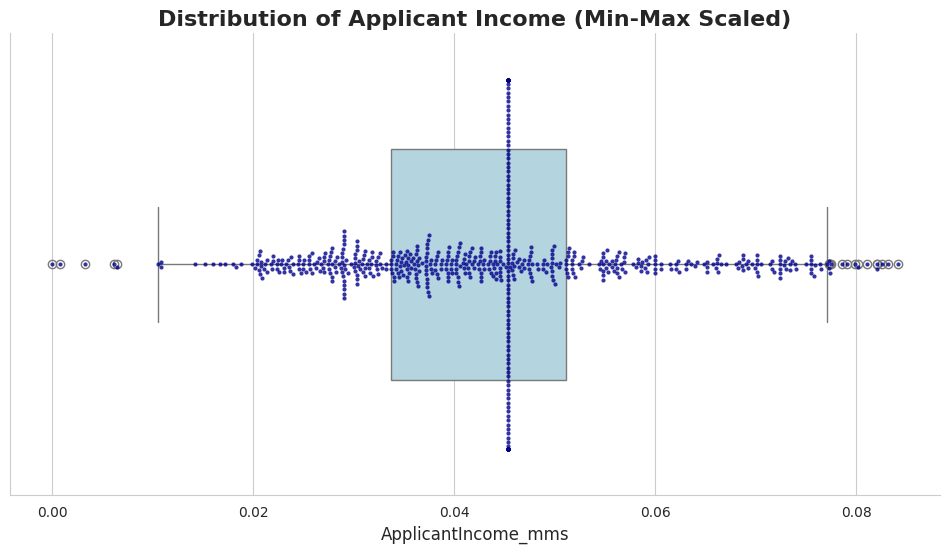

In [30]:
# Set the plot style to 'whitegrid' for a clean, professional look
sns.set_style('whitegrid')

# Create the figure and axes
plt.figure(figsize=(12, 6))

# Create the box plot first, with a lighter color and reduced width
# The `zorder` parameter ensures that the box plot is drawn below the swarm plot
sns.boxplot(x=dataset['ApplicantIncome_mms'], color='lightblue', width=0.5, zorder=1)

# Overlay the swarm plot on top to visualize every data point, especially the outliers
# We use `zorder` to ensure the swarm plot is on top and `alpha` for transparency
sns.swarmplot(x=dataset['ApplicantIncome_mms'], color='darkblue', size=3, alpha=0.8,zorder=2)

# Set a clear title and x-axis label
plt.title('Distribution of Applicant Income (Min-Max Scaled)', fontsize=16, fontweight='bold')
plt.xlabel('ApplicantIncome_mms', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.show()

# ⭐⭐⭐ **NOTE**:

- #### The **vertical line** of dots in the middle of the box plot is created by the swarmplot. It shows where the highest concentration of data points is located. Because there are so many values in that range, the swarmplot arranges the individual data points vertically to prevent them from overlapping, creating that line-like appearance. This provides a clear visual representation of the data's density at that specific point.

- #### **despine()**: In Matplotlib and Seaborn plots, the "spines" are the lines that form the box around the visualization (the top, bottom, left, and right borders). The despine() function removes the top and right spines by default, which can make the chart look cleaner and less cluttered, directing the viewer's attention to the data itself rather than the chart's frame.

- #### **swarmplot** explained simply: A swarmplot is a type of chart that plots every single data point. Unlike other plots that might show a point for each value, a swarmplot makes sure none of the points overlap. It arranges them next to each other, like a swarm of bees, to show the distribution of the data. This is particularly useful when you want to see where data is clustered and to identify every single outlier, as it plots each individual value without hiding it. The documentation mentions it is great for complementing a box plot because it shows the full dataset, while the box plot provides a summary of it. However, because it plots every point individually, it can become slow or messy with very large datasets.

In [31]:
help(sns.swarmplot)

Help on function swarmplot in module seaborn.categorical:

swarmplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor=None, linewidth=0, hue_norm=None, log_scale=None, native_scale=False, formatter=None, legend='auto', warn_thresh=0.05, ax=None, **kwargs)
    Draw a categorical scatterplot with points adjusted to be non-overlapping.

    This function is similar to :func:`stripplot`, but the points are adjusted
    (only along the categorical axis) so that they don't overlap. This gives a
    better representation of the distribution of values, but it does not scale
    well to large numbers of observations. This style of plot is sometimes
    called a "beeswarm".

    A swarm plot can be drawn on its own, but it is also a good complement
    to a box or violin plot in cases where you want to show all observations
    along with some representation of the underlying distribution.

    See the :ref:

# ⭐⭐⭐ **Outlier Handling : By Using Capping/Winsorizing**

### Instead of removing, **limit** values to the threshold range.

### For this we will need **`np.where(condition, value, condition, value, columnName)`**

#### 📘 Explanation:

##### **`np.where(condition, value_if_true, value_if_false)`** for this method we need  **numpy**

##### **Replaces extreme values with nearest bound**

##### **You cannot omit the value_if_false argument in np.where — it’s required. If you want to “leave the value unchanged”, you must explicitly pass the original column/array as the value_if_false.**

#### normal usage of **`np.where()`**
``` python
    df['Age_Capped'] = np.where(df['Age'] > upper_bound,
                            upper_bound,      # replace if above upper_bound
                            df['Age'])        # keep original if not

```

#### nested **`np.where()`**

```python
    df['Age_Capped'] = np.where(df['Age'] > upper_bound, upper_bound,
                            np.where(df['Age'] < lower_bound, lower_bound, df['Age']))

```



In [32]:
import numpy as np

In [33]:
df["ApplicantIncome_mms"] = np.where(df["ApplicantIncome_mms"] > upper_bound, upper_bound,
                                     np.where(df["ApplicantIncome_mms"] < lower_bound, lower_bound ,df["ApplicantIncome_mms"]))

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


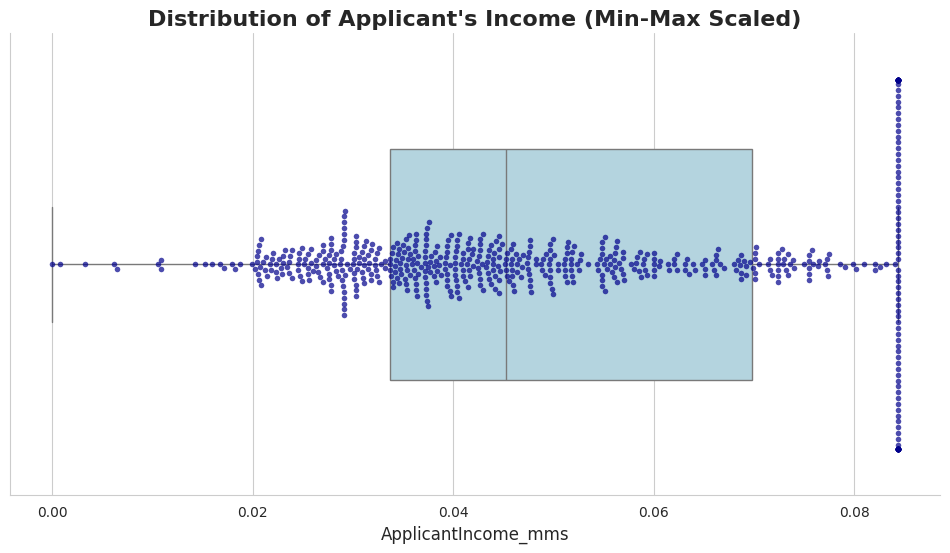

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))

sns.boxplot(
    x = "ApplicantIncome_mms",
    data = df,
    width= 0.5,
    color = "lightblue",
    zorder = 1
)

sns.swarmplot(
    x = "ApplicantIncome_mms",
    data = df,
    color = 'darkblue',
    size = 4,
    alpha = 0.7,
    zorder = 2
)

plt.title("Distribution of Applicant's Income (Min-Max Scaled)",fontsize = '16', fontweight = 'bold')

plt.xlabel("ApplicantIncome_mms", fontsize = 12)

sns.despine()

plt.show()


# ⭐⭐⭐ **NOTE FOR ABOVE PLOT**

## 📊 The line inside the boxplot:

### 👉 **It represents the Median (Q2) of the data — i.e., the 50th percentile.**

## 📦 Breakdown of a Boxplot (given when it is in vertical orientation):

| Part                     | Meaning                             |
| ------------------------ | ----------------------------------- |
| **Bottom of the box**    | 1st Quartile (Q1 → 25th percentile) |
| **Top of the box**       | 3rd Quartile (Q3 → 75th percentile) |
| **Line inside the box**  | Median (Q2 → 50th percentile)       |
| **Whiskers**             | Data within 1.5×IQR from Q1 and Q3  |
| **Dots beyond whiskers** | Outliers                            |



<hr>

# 🌟🌟🌟 Better, clearer and faster alternatives

### **This directly caps values to the bounds and is vectorized & fast.**

```python
    df['Age_Capped'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)
```


In [35]:
df1["ApplicantIncome_mms"] = df1["ApplicantIncome_mms"].clip(lower = lower_bound, upper=upper_bound)

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


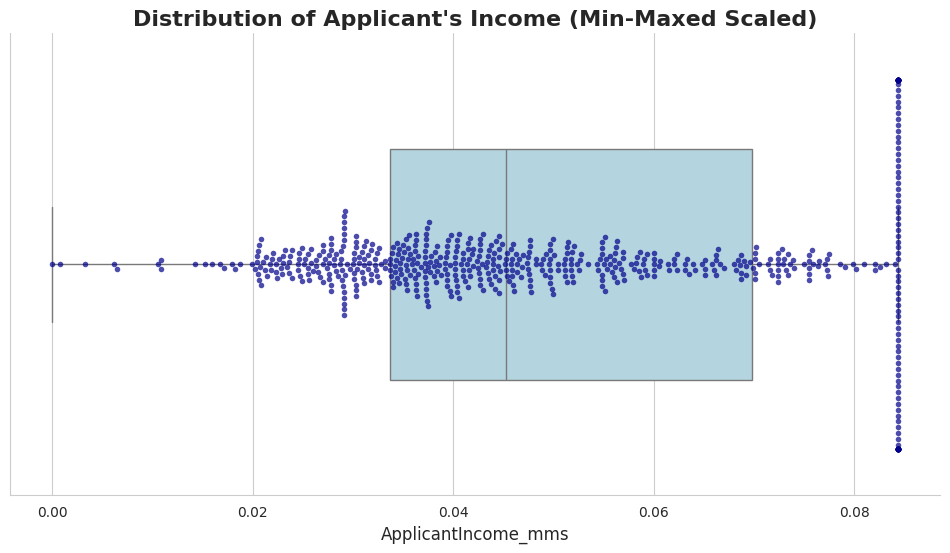

In [36]:
#now again let see the box plot

sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
plt.title("Distribution of Applicant's Income (Min-Maxed Scaled)", fontsize = 16, fontweight = "bold")

sns.boxplot(
    x = "ApplicantIncome_mms",
    data = df1,
    width = 0.5, 
    color = "lightblue",
    zorder = 1
)

sns.swarmplot(
    x = "ApplicantIncome_mms",
    data = df1,
    size = 4, 
    color = "darkblue",
    alpha = 0.7,
    zorder = 2
)

plt.xlabel("ApplicantIncome_mms",fontsize = 12)
sns.despine()
plt.show()
